In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import yfinance as yf
import statsmodels.api as sm


Importamos datos

In [8]:
df = pd.read_excel('deflactacion_corrientes.xlsx')
df = df.set_index('fecha')

Hacemos la descomposicion 

In [9]:
descomposicion = seasonal_decompose(df['total_facturacion'])

graficamos el resultado

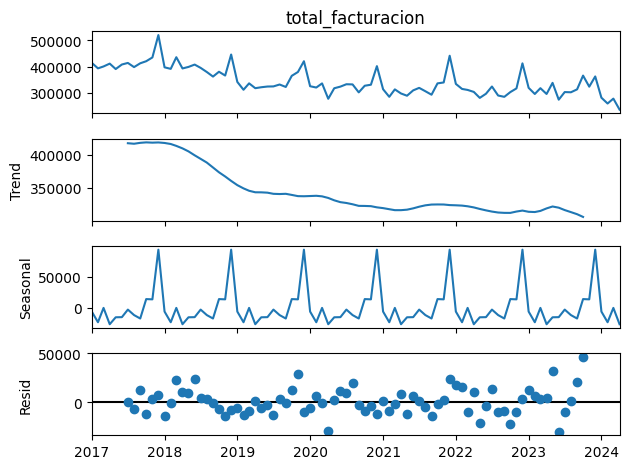

In [10]:
var = descomposicion.plot()

[*********************100%%**********************]  1 of 1 completed


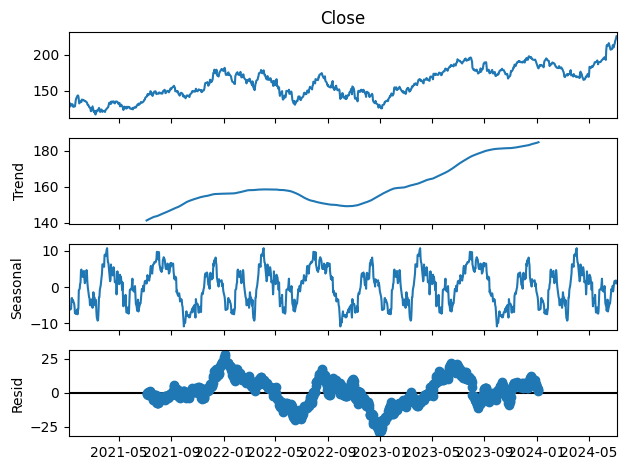

In [11]:
data = yf.download('AAPL',start='2021-01-01')

# Asegurarse de que la columna 'Close' tenga un índice de fecha con frecuencia diaria
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')

# Llenar los valores faltantes (por ejemplo, fines de semana y festivos)
data['Close'] = data['Close'].interpolate()

# Descomposición de la serie temporal especificando el período
descomposicion_data = seasonal_decompose(data['Close'], model='additive',period=365)

# Graficar los componentes
descomposicion_data.plot()
plt.show()

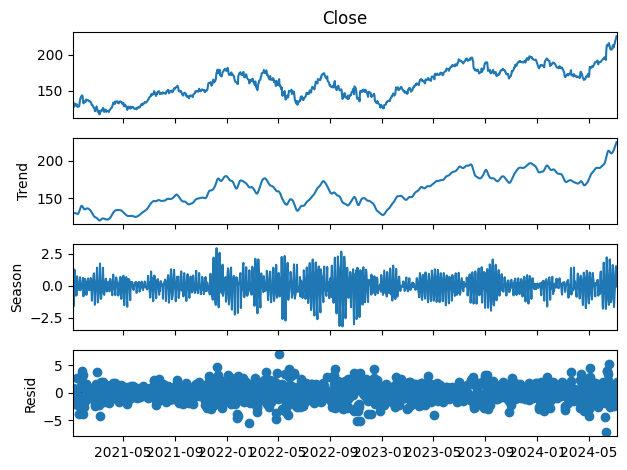

In [12]:
co2_stl = STL(data['Close']).fit()
co2_stl.plot()
plt.show()

In [13]:
print("Residuos:",co2_stl.resid.mean())

Residuos: -0.004949441397146372


Prueba de SP500 usando una regresion

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descargar los datos de AAPL
data = yf.download('AAPL', start='2019-01-01')

# Crear variables de tendencia y estacionalidad
data['Fecha'] = data.index
data['Tendencia'] = np.arange(len(data))
data['Mes'] = data['Fecha'].dt.month
data['Precio_lag'] = data['Close'].shift(1)

# Crear variables dummy para los meses
data = pd.get_dummies(data, columns=['Mes'], drop_first=True)

# Eliminar filas con valores NaN debido a la creación de la variable lag
data = data.dropna(subset=['Precio_lag'])

# Definir X e y
X = data[['Precio_lag', 'Tendencia'] + [col for col in data.columns if 'Mes_' in col]]
y = data['Close']

# Dividir el conjunto de datos en entrenamiento (90%) y prueba (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)


[*********************100%%**********************]  1 of 1 completed


In [16]:
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el forecaster
forecaster = ForecasterAutoregMultiSeries(
    regressor=RandomForestRegressor(n_estimators=100),
    lags=1
)

